In [1]:
# !python -m pip install --upgrade pip
!python -m pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 677.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 836.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

# Import statements

In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Load data

AutoGluon's `TabularDataset` is a subclass of pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), so any `DataFrame` methods can be used on `TabularDataset` as well.

In [3]:
from google.colab import dri
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# define paths
train_path='/content/drive/MyDrive/singapore/train_data.csv'

test_path= '/content/drive/MyDrive/singapore/test_data.csv'

# load
train_data= pd.read_csv(train_path)

test_data=pd.read_csv(test_path)


# remove the number of likes, comments and amount of followers
train_data= train_data.drop(["post_id", "engagement_difference", "cat_features_idx","num_likes", "num_comments","num_followers","text_tokenized_no_stops",'is_event_numeric',
       'contains_link_numeric', 'High_vividness', 'Low_vividness',
       'Medium_vividness', 'Evening', 'Afternoon', 'Night', 'Morning',
       'landscape', 'square', 'portrait', 'Spring', 'Summer', 'Fall'], axis=1)
print(f"The train_data set has {len(train_data)} rows")

test_data=test_data.drop(["post_id", "engagement_difference", "cat_features_idx","num_likes", "num_comments","num_followers", "text_tokenized_no_stops",'is_event_numeric',
       'contains_link_numeric', 'High_vividness', 'Low_vividness',
       'Medium_vividness', 'Evening', 'Afternoon', 'Night', 'Morning',
       'landscape', 'square', 'portrait', 'Spring', 'Summer', 'Fall'], axis=1)
print(f"The test_data set has {len(test_data)} rows")


The train_data set has 826 rows
The test_data set has 207 rows


In [5]:
# convert to tabular format
train_data_tabular_regression = TabularDataset(train_data)
train_data_tabular_regression.head()
# we are interested in predicting the engagement
label = 'engagement'
train_data_tabular_regression[label].describe()

count    826.000000
mean       1.537496
std        0.644979
min        0.308999
25%        1.060391
50%        1.458215
75%        1.913382
max        5.780924
Name: engagement, dtype: float64

## Training Regression

We now construct a `TabularPredictor` by specifying the label column name and then train on the dataset with `TabularPredictor.fit()`. We don't need to specify any other parameters. AutoGluon will recognize this is a regression task, perform automatic feature engineering, train multiple models, and then ensemble the models to create the final predictor.

In [6]:
predictor_regression = TabularPredictor(label=label).fit(train_data_tabular_regression,presets='best_quality', time_limit=1200)

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_224236"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231219_224236/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20231219_224236/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

# Shap

In [7]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.0 MB/s eta 0:00:00


In [8]:
import shap

In [9]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names, target_class=None):
        self.ag_model = predictor
        self.feature_names = feature_names
        self.target_class = target_class
        if target_class is None and predictor.problem_type != 'regression':
            print("Since target_class not specified, SHAP will explain predictions for each class")

    def predict_proba(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        preds = self.ag_model.predict(X)

        return preds


In [10]:
# Define the baseline reference value by randomly sampling 50% of the observations
baseline = train_data_tabular_regression.sample(frac=0.3, random_state=42)

# Display the first few rows of the baseline_sampled DataFrame
display(baseline.head())


,text,num_words,num_hashtags,num_tags,num_exclamation_marks,num_question_marks,is_event,sentiment,subjectivity,contains_link,...,country_bool_idx,contains_city_idx,is_weekday_idx,has_airplane_idx,has_brand_logo_idx,season_idx,part_of_day_idx,vividness_idx,location_cat_idx,aspect_ratio_category_idx
648,“I'm very amazed with the quality of food for an on-board meal!” - @riniong #FlySQ #SingaporeAir #SQfoodie\r\n,11.0,3.0,1.0,1.0,0.0,False,0.5838,0.3,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,Keeping you company through your #FlySQ #SingaporeAir journeys.\r\n📷 : @charmaineczx\r\n,7.0,2.0,1.0,0.0,0.0,False,0.0000,0.0,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
67,"Every fine detail plays a big part in enhancing your inflight dining experience. \r\nAt Singapore Airlines, there's #NoDetailTooSmall.\r\n\r\n#FlySQ #SingaporeAir\r\n",16.0,2.0,0.0,0.0,0.0,False,0.4215,0.3,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
168,"Not 1, not 2, but... #FlySQ #SingaporeAir #SQAVgeek 📷: @dat_plane_guy\r\n",7.0,3.0,1.0,0.0,0.0,False,0.0000,0.0,False,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
275,“… each bite on @singaporeair was worth staying up for.” - @zachspassport #FlySQ #SingaporeAir #SQFoodie\r\n,11.0,3.0,2.0,0.0,0.0,False,0.2263,0.1,False,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0


In [11]:
# # define the baseline reference value for SHAP
# baseline = train_data_tabular_regression
# display(baseline.head())


In [12]:

 # create a KernelExplainer which will return Kernel SHAP values to explain particular AutoGluon predictions
ag_wrapper = AutogluonWrapper(predictor_regression, train_data_tabular_regression.columns, label)
explainer = shap.KernelExplainer(ag_wrapper.predict_proba, baseline)
print("Baseline prediction: ", np.mean(ag_wrapper.predict_proba(baseline)))  # this is the same as explainer.expected_value

NSHAP_SAMPLES = 100  # how many samples to use to approximate each Shapely value, larger values will be slower

Baseline prediction:  1.4926025


In [13]:
#  #explain a prediction for a single datapoint from the training data.

# ROW_INDEX = 0  # index of an example datapoint
# single_datapoint = train_data_tabular_regression.iloc[[ROW_INDEX]]
# single_prediction = ag_wrapper.predict_proba(single_datapoint)

# shap_values_single = explainer.shap_values(single_datapoint, nsamples=NSHAP_SAMPLES)
# shap.force_plot(explainer.expected_value, shap_values_single, train_data_tabular_regression.iloc[ROW_INDEX,:],matplotlib=True)

In [19]:
# plot Kernel SHAP explanations aggregated across many predictions, say over 100 datapoints in the test data.
import random
# Get the number of rows in your dataset
total_rows = len(test_data)

# Select 100 random indices
random_indices = random.sample(range(total_rows), 100)


# Extract the corresponding rows from the dataset
random_rows_df = test_data.iloc[random_indices]

test_data_tab_regression = TabularDataset(random_rows_df)

In [18]:
shap_values = explainer.shap_values(test_data_tab_regression, nsamples=40)
shap.force_plot(explainer.expected_value, shap_values, test_data_tab_regression)  # if you do not have add argument

  0%|          | 0/100 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.438e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=3.889e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=3.329e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=3.289e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residue

In [21]:
shap_values[np.abs(shap_values) > 0.5] = 0

AttributeError: ignored

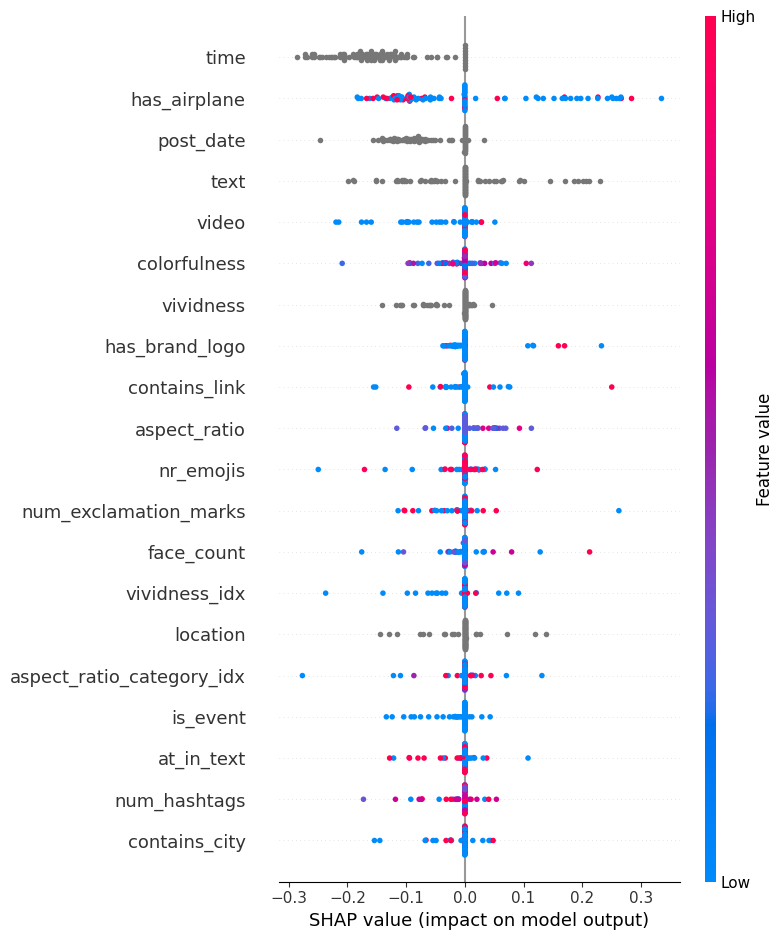

In [26]:
import matplotlib as plt
# Calculate shap_values
shap.summary_plot(shap_values, test_data_tab_regression, show=False)
ax = plt.gca()

# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(-0.2, 0.2)
plt.show()

## Feature importance

In [27]:
# feature importance
feature_importance= predictor_regression.feature_importance(data=train_data_tabular_regression)
feature_importance["variable"]= feature_importance.index

These features in provided data are not utilized by the predictor and will be ignored: ['num_question_marks', 'ad', 'location_cat', 'city_bool', 'country_bool', 'is_event_idx', 'contains_link_idx', 'city_bool_idx', 'country_bool_idx', 'contains_city_idx', 'has_airplane_idx', 'has_brand_logo_idx', 'location_cat_idx']
Computing feature importance via permutation shuffling for 38 features using 826 rows with 5 shuffle sets...
	800.29s	= Expected runtime (160.06s per shuffle set)
	496.48s	= Actual runtime (Completed 5 of 5 shuffle sets)


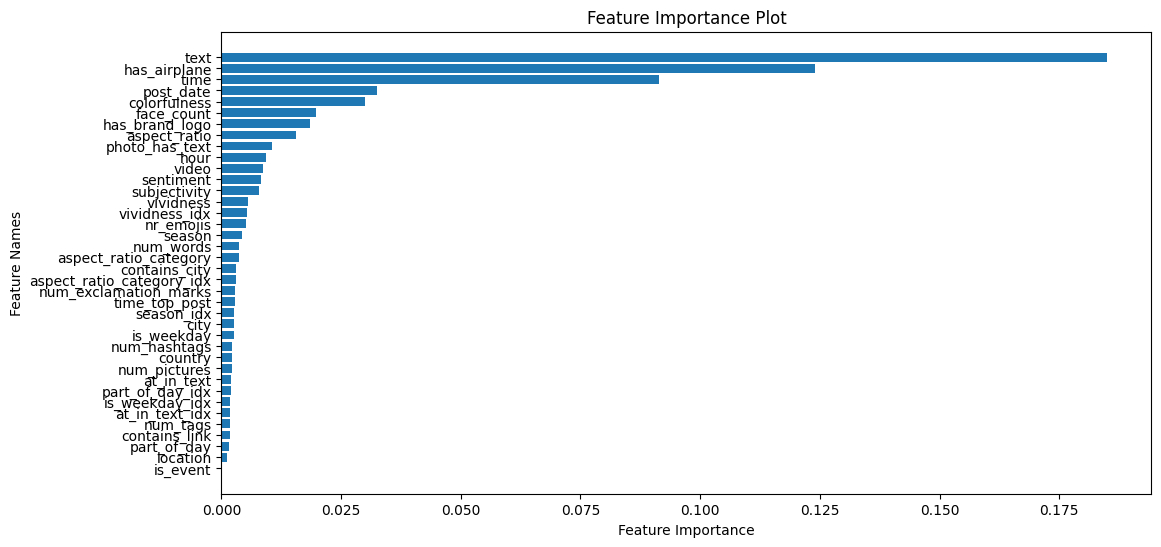

In [28]:
import matplotlib.pyplot as plt

#Extract feature names and importances
feature_names = feature_importance['variable']
importances = feature_importance['importance']

# Create a bar plot for feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

## Prediction and Saving predictions of regression

Once we have a predictor that is fit on the training dataset, we can load a separate set of data to use for prediction and evaulation.

In [29]:
test_data_tab_regression = TabularDataset(test_data)

test_data_tab_regression["predictions_engagement"] = predictor_regression.predict(test_data_tab_regression.drop(columns=[label]))
test_data_tab_regression.head()

,text,num_words,num_hashtags,num_tags,num_exclamation_marks,num_question_marks,is_event,sentiment,subjectivity,contains_link,...,contains_city_idx,is_weekday_idx,has_airplane_idx,has_brand_logo_idx,season_idx,part_of_day_idx,vividness_idx,location_cat_idx,aspect_ratio_category_idx,predictions_engagement
0,"Experience different seasons, festivals and more when you re-visit the same city! Which city will you be returning to?\r\n\r\n#FlySQ #SingaporeAir\r\n",10.0,2.0,0.0,1.0,0.0,False,0.4199,0.408333,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.923712
1,"Take a closer look, are you able to spot Mount Fuji from afar? #FlySQ #SingaporeAir #viewfromthetop\r\n📷: @foodielah\r\n",12.0,3.0,1.0,0.0,0.0,False,0.0000,0.625000,False,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.622844
2,Come on a new adventure with us! \r\n#FlySQ #SingaporeAir #SQavgeek\r\n📷: @twoplanespotters\r\n,8.0,3.0,1.0,1.0,0.0,False,0.3802,0.454545,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600283
3,"Imagine opening your window shade to this #viewfromthetop, share yours with our hashtags #FlySQ #SingaporeAir ! 📷: @thisisrnzw\r\n",12.0,3.0,1.0,1.0,0.0,False,0.3595,0.000000,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.407276
4,An amazing shot captured by @sjaviationphotography of our Airbus A380 gliding over clear blue waters.\r\n\r\n#FlySQ #SingaporeAir #SQavgeek\r\n,12.0,3.0,1.0,0.0,0.0,False,0.7506,0.461111,False,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.792610


In [30]:
# calculate RMSE and MSE
# Extract the true values and predicted values from the DataFrame
true_values = test_data_tab_regression['engagement']
predicted_values = test_data_tab_regression['predictions_engagement']

# Calculate MSE
mse = mean_squared_error(true_values, predicted_values)
# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.2580625370582386
RMSE: 0.5079985600946508


In [31]:
# write to csv
test_data_tab_regression.to_csv('/content/drive/MyDrive/singapore/predictions_regression.csv', index=False)


## Evaluation_regression

We can evaluate the predictor on the test dataset using the `evaluate()` function, which measures how well our predictor performs on data that was not used for fitting the models.

In [32]:
predictor_regression.evaluate(test_data_tab_regression, silent=False)
# rather strange that these metrics are negative

Evaluation: root_mean_squared_error on test data: -0.5079985600946508
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5079985600946508,
    "mean_squared_error": -0.2580625370582386,
    "mean_absolute_error": -0.3563445893966831,
    "r2": 0.3617677641159055,
    "pearsonr": 0.6042274006841096,
    "median_absolute_error": -0.2722349538716975
}


{'root_mean_squared_error': -0.5079985600946508,
 'mean_squared_error': -0.2580625370582386,
 'mean_absolute_error': -0.3563445893966831,
 'r2': 0.3617677641159055,
 'pearsonr': 0.6042274006841096,
 'median_absolute_error': -0.2722349538716975}

AutoGluon's `TabularPredictor` also provides the `leaderboard()` function, which allows us to evaluate the performance of each individual trained model on the test data.

In [33]:
predictor_regression.leaderboard(test_data_tab_regression,extra_info=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,CatBoost_r177_BAG_L1,-0.504339,-0.453612,root_mean_squared_error,0.051873,0.504796,34.170146,0.051873,0.504796,34.170146,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[__nlp__.share, __nlp__.flysq singaporeair, __nlp__.using, is_event, num_pictures, text.symbol_count./, __nlp__.next, __nlp__.on, __nlp__.board, text.symbol_ratio.@, is_weekday_idx, __nlp__.what, __nlp__.www singaporeair, text.symbol_count.?, aspect_ratio, time.year, __nlp__.in, season_idx, text.symbol_count.., __nlp__.is, has_brand_logo, post_date, __nlp__.flysq singaporeair sqfoodie, __nlp__.to, __nlp__.and, time.dayofweek, __nlp__.of the, __nlp__.your favourite, __nlp__.flysq, __nlp__.to be, __nlp__.favourite, __nlp__.where, __nlp__.a350, text.symbol_ratio.:, vividness_idx, __nlp__.at, ...",None,"{'iterations': 10000, 'learning_rate': 0.06864209415792857, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'RMSE', 'depth': 6, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 2.1542798306067823, 'max_ctr_complexity': 4, 'one_hot_max_size': 10}",{'iterations': 327},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}",[],"[XGBoost_BAG_L2, LightGBMXT_BAG_L2, WeightedEnsemble_L2, ExtraTreesMSE_BAG_L2, CatBoost_BAG_L2, LightGBMLarge_BAG_L2, NeuralNetTorch_BAG_L2, WeightedEnsemble_L3, NeuralNetFastAI_BAG_L2, RandomForestMSE_BAG_L2, LightGBM_BAG_L2]"
1,WeightedEnsemble_L2,-0.504528,-0.439102,root_mean_squared_error,1.147559,1.719599,267.566457,0.003861,0.000572,0.697200,...,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBMLarge_BAG_L1, ExtraTreesMSE_BAG_L1, NeuralNetFastAI_r191_BAG_L1, NeuralNetTorch_r79_BAG_L1, CatBoost_r177_BAG_L1, LightGBM_BAG_L1, CatBoost_BAG_L1]",None,{'ensemble_size': 100},{'ensemble_size': 84},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBMLarge_BAG_L1, ExtraTreesMSE_BAG_L1, NeuralNetFastAI_r191_BAG_L1, NeuralNetTorch_r79_BAG_L1, CatBoost_r177_BAG_L1, LightGBM_BAG_L1, CatBoost_BAG_L1]",[]
2,NeuralNetTorch_BAG_L2,-0.504608,-0.455882,root_mean_squared_error,2.412848,4.096052,577.916847,0.194144,0.346592,48.011194,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_